# **Car price Prediction Using Machine Learning**
## *OASIS INFOBYTE - TASK 3*
## NAME : MOHAMED AFSAL

# *Statement of Problem*
The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

**importing libraries**

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib Inline

In [273]:
#loading data file
price_df = pd.read_csv('/content/CarPrice_Assignment.csv')

In [274]:
# To display top 5 rows
price_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [275]:
price_df = price_df.drop(columns=['car_ID'])

In [276]:
# checking for null values
price_df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [277]:
# checking for duplicate values
price_df.duplicated().sum()

0

**Data visualization**

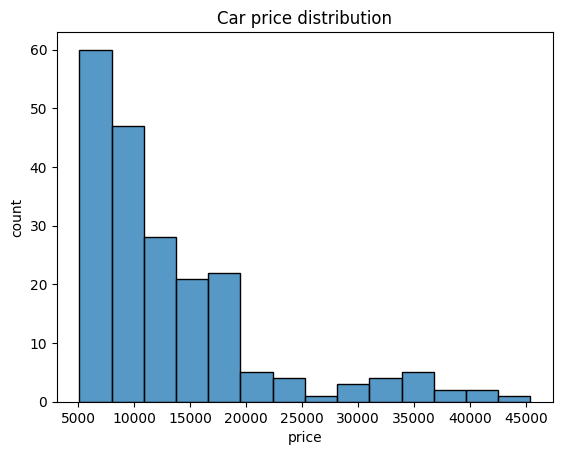

In [278]:
# To plot a graph
sns.histplot(price_df['price'])
plt.title('Car price distribution')
plt.xlabel('price')
plt.ylabel('count')
plt.show()

In [279]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [280]:
# seperating data
value_cols = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
              'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
              'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
req_col = 'price'
X = price_df[value_cols]
y = price_df[req_col]

In [281]:
label_encoder = LabelEncoder()
for col in X.columns:
  if X[col].dtype == 'object':
    X[col] = label_encoder.fit_transform(X[col])

**splitting data into train data and test data**

In [282]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test=tts(X,y, test_size=0.2,random_state=42)

In [283]:
y_train

66     18344.0
111    15580.0
153     6918.0
96      7499.0
38      9095.0
        ...   
106    18399.0
14     24565.0
92      6849.0
179    15998.0
102    14399.0
Name: price, Length: 164, dtype: float64

In [284]:
X_train

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
66,0,0,0,0,3,2,0,104.9,175.0,66.1,...,2,134,3,3.43,3.64,22.0,72,4200,31,39
111,0,1,0,0,3,2,0,107.9,186.7,68.4,...,2,120,5,3.46,2.19,8.4,95,5000,19,24
153,0,1,0,0,4,1,0,95.7,169.7,63.6,...,2,92,1,3.05,3.03,9.0,62,4800,31,37
96,1,1,0,0,3,1,0,94.5,165.3,63.8,...,2,97,1,3.15,3.29,9.4,69,5200,31,37
38,0,1,0,1,2,1,0,96.5,167.5,65.2,...,2,110,0,3.15,3.58,9.0,86,5800,27,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,1,0,1,2,2,0,99.2,178.5,67.9,...,3,181,5,3.43,3.27,9.0,160,5200,19,25
14,1,1,0,0,3,2,0,103.5,189.0,66.9,...,3,164,5,3.31,3.19,9.0,121,4250,20,25
92,1,1,0,0,3,1,0,94.5,165.3,63.8,...,2,97,1,3.15,3.29,9.4,69,5200,31,37
179,3,1,0,1,2,2,0,102.9,183.5,67.7,...,3,171,5,3.27,3.35,9.3,161,5200,19,24


In [288]:
X_test

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
15,0,1,0,0,3,2,0,103.5,189.0,66.9,...,3,209,5,3.62,3.390,8.00,182,5400,16,22
9,0,1,1,1,2,0,0,99.5,178.2,67.9,...,1,131,5,3.13,3.400,7.00,160,5500,16,22
100,0,1,0,0,3,1,0,97.2,173.4,65.2,...,2,120,1,3.33,3.470,8.50,97,5200,27,34
132,3,1,0,1,2,1,0,99.1,186.6,66.5,...,2,121,5,3.54,3.070,9.31,110,5250,21,28
68,-1,0,1,0,4,2,0,110.0,190.9,70.3,...,1,183,3,3.58,3.640,21.50,123,4350,22,25
95,1,1,0,1,2,1,0,94.5,165.6,63.8,...,2,97,1,3.15,3.290,9.40,69,5200,31,37
159,0,0,0,0,2,1,0,95.7,166.3,64.4,...,2,110,3,3.27,3.350,22.50,56,4500,38,47
162,0,1,0,0,3,1,0,95.7,166.3,64.4,...,2,98,1,3.19,3.030,9.00,70,4800,28,34
147,0,1,0,0,4,1,0,97.0,173.5,65.4,...,2,108,5,3.62,2.640,9.00,94,5200,25,31
182,2,0,0,1,3,1,0,97.3,171.7,65.5,...,2,97,3,3.01,3.400,23.00,52,4800,37,46


In [289]:
y_test

15     30760.000
9      17859.167
100     9549.000
132    11850.000
68     28248.000
95      7799.000
159     7788.000
162     9258.000
147    10198.000
182     7775.000
191    13295.000
164     8238.000
65     18280.000
175     9988.000
73     40960.000
152     6488.000
18      5151.000
82     12629.000
86      8189.000
143     9960.000
60      8495.000
101    13499.000
98      8249.000
30      6479.000
25      6692.000
16     41315.000
168     9639.000
195    13415.000
97      7999.000
194    12940.000
67     25552.000
120     6229.000
154     7898.000
202    21485.000
79      7689.000
69     28176.000
145    11259.000
55     10945.000
45      8916.500
84     14489.000
146     7463.000
Name: price, dtype: float64

**Results of Prediction**

In [285]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [286]:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Root mean squared error:", rmse)

Root mean squared error: 3989.535026220401


In [287]:
car_data = [[2, 'gas', 'std', 'four', 'sedan', 'fwd', 'front', 99.8, 176.6, 66.2, 54.3, 2337, 'ohc', 'four',
  109, 'mpfi', 3.19, 3.4, 10, 102, 5500, 24, 30]]
car_df= pd.DataFrame(car_data, columns=value_cols)
new_car_encoded = pd.get_dummies(car_df, drop_first=True)
new_car_encoded = new_car_encoded.reindex(columns=X_train.columns, fill_value=0)
predicted_price = model.predict(new_car_encoded)
print("Predicted price of car: ", predicted_price)

Predicted price of car:  [10919.66982499]
